<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Дополнительные библиотеки для визуализаций

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Читаем файл с помощю инструментов Pandas, учитывая разделитель ';'

df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [3]:
# Проверяем размерность датасета

df.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
df.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Все столбцы в датасете имеют формат object.

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
# Проверяем столбцы с пропусками в данных

df.isnull().sum().sort_values(ascending=False)

Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

Таким образом, большинство пропущенных значений распологается в столбце "Опыт работы" - 168 записей.

5. Выведите основную статистическую информацию о столбцах.


In [7]:
df.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
# При помощи метода find() вытаскиваем из строки ступень образования, применяем ко всем элементам столбца

df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: x[0:x.find(' образование')].lower())

# Проверяем категории образования

education_category = list(df['Образование'].unique())
n_school_education = df['Образование'].value_counts()['среднее']

print('Категории образования:', education_category)
print('Средний уровень образования имеют', n_school_education, 'человек')

Категории образования: ['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее']
Средний уровень образования имеют 559 человек


In [9]:
# Удаляем исходный столбец из датасета

df.drop('Образование и ВУЗ', axis=1, inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
# Поскольку структура столбца одинаковая, для пола оставляем первый символ строки

df['Пол'] = df['Пол, возраст'].apply(lambda x: x.split(' , ')[0][0])

# Для возраста из сплита вытаскиваем 2-ой элемент списка и оставляем толко численные значения

df['Возраст'] = df['Пол, возраст'].apply(lambda x: int("".join(y for y in x.split(' , ')[1] if y.isdigit())))

In [11]:
# Удаляем исходный столбец из датасета

df.drop('Пол, возраст', axis=1, inplace=True)

In [12]:
# Ответы на вопросы с платформы

female_freq = round(df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)
mean_age = round(df['Возраст'].mean(), 1)

print('Относительная частота женских резюме:', female_freq, '%')
print('Средний возраст соискателей:', mean_age)

Относительная частота женских резюме: 19.07 %
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [13]:
def extract_exp_job(element:str) -> int:
    """Функция для извлечения опыта работы в месяцах из строки датасета

    Args:
        element(str): текущий элемент столбца

    Returns:
        total_months(int): опыт работы в месяцах
    """
    # Делаем проверку на корректность значений в строке, если некорректно - возвращаем NaN
    if element == np.nan:
        return np.nan
    elif element == 'Не указано' or type(element) is float:
        return np.nan
    else:
        # Получаем фразу "Опыт работы n месяцев [лет/лет m месяцев]"
        element_split = element.split('  ')[0].split(' ')[2:]
        # Вводим счетчик годов и месяцев
        years = 0
        months = 0
        total_months = 0
        
        # Проверяем формат записи (лет и месяцев, лет, месяцев)
        if len(element_split) == 4:
            years = int(element_split[0])
            months = int(element_split[2])
            total_months = years * 12 + months
        else:
            variable = int(element_split[0])
            total_months = variable * 12 if element_split[1] in ['год', 'года', 'лет'] else variable
            
    return total_months

# Применяем функцию extract_exp_job() к датасету, создавая новый столбец с данными

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_exp_job)    

In [14]:
# Удаляем исходный столбец из датасета

df.drop('Опыт работы', axis=1, inplace=True)

In [15]:
# Ответы на вопросы с платформы

median_exp_job = round(df['Опыт работы (месяц)'].median(), 2)

print('Медианный опыт работы:', median_exp_job)

Медианный опыт работы: 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [16]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ] 

def extract_city_ready_trips(element:str) -> pd.Series:
    """Функция для парсинга столбца "Город, переезд, командировки"

    Args:
        element(str): элемент столбца

    Returns:
        elements(pd.Series): series с тремя столбцами (Город, Готовность к командировкам, Готовность к переезду)
    """
    element_split = element.split(', ')
    city = ''
    ready_relocation = False
    ready_trip = False
    
    # Создаем фильтрацию для столбца Город
    if element_split[0][0:-1] in ['Москва', 'Санкт-Петербург']:
        city = element_split[0][0:-1].lower()
    elif element_split[0][0:-1] in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
        
    # Создаем фильтрацию для столбца Готовность к переезду
    if 'переезду' in element:
        if ('не готов к переезду' in element) or ('не готова к переезду' in element):
            ready_relocation = False
        else:
            ready_relocation = True
    elif 'хочу' in element:
        ready_relocation = True
    else:
        ready_relocation = False
    
    # Создаем фильтрацию для столбца Готовность к командировкам
    if 'командировка' in element:
        if ('не готов к командировкам' in element) or ('не готова к командировкам' in element):
            ready_trip = False
        else:
            ready_trip = True
    else:
        ready_trip = False
    
    elements = pd.Series([city, ready_relocation, ready_trip])
    return elements

# Применяем функцию extract_city_ready_trips() к датасету, создавая новые столбцы с данными

df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(extract_city_ready_trips)

In [17]:
# Удаляем исходный столбец из датасета

df.drop('Город, переезд, командировки', axis=1, inplace=True)

In [18]:
# Ответы на вопросы с платформы

percent_st_peterburg = round(df['Город'].value_counts(normalize=True) * 100)['санкт-петербург']

mask_1 = df['Готовность к переезду'] == True
mask_2 = df['Готовность к командировкам'] == True
percent_ready_reloc_trip = round(df[mask_1 & mask_2].shape[0] / df.shape[0] * 100)

print('Процент соискателей из Санкт-Петербурга:', percent_st_peterburg, '%')
print('Процент соискателей, готовых и к командировкам и к переездам:', percent_ready_reloc_trip, '%')

Процент соискателей из Санкт-Петербурга: 11.0 %
Процент соискателей, готовых и к командировкам и к переездам: 32 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [19]:
# С помощью цикла создаем список из категорий типа занятости

employment_categories = []

for element in df['Занятость']:
    element_lst = element.split(', ')
    for i in element_lst:
        if i not in employment_categories:
            employment_categories.append(i)

# С помощью цикла создаем список из категорий типа графика
 
shedule_categories = []

for element in df['График']:
    element_lst = element.split(', ')
    for i in element_lst:
        if i not in shedule_categories:
            shedule_categories.append(i)
            
def one_hot_encode(column:pd.Series, lst_category:list):
    """Функция для преобразования признаков методом one-hot-encoding

    Args:
        column(pd.Series): столбец
        lst_category(list): список категорий у столбца
    """
    for element in lst_category:
        df[element] = column.apply(lambda x: True if element in x else False)

# Применяем функцию one_hot_encode к нужным столбцам

one_hot_encode(df['Занятость'], employment_categories)
one_hot_encode(df['График'], shedule_categories)

In [20]:
# Ответы на вопросы с платформы

mask_1 = df['проектная работа'] == True
mask_2 = df['волонтерство'] == True
n_project_and_volun = df[mask_1 & mask_2].shape[0]

mask_3 = df['вахтовый метод'] == True
mask_4 = df['гибкий график'] == True
n_watch_and_flex = df[mask_3 & mask_4].shape[0]

print('Количество людей, которые ищут проектную работу и волонтёрство:', n_project_and_volun)
print('Количество людей, которые ищут способ работать вахтовым методом и с гибким графиком:', n_watch_and_flex)

Количество людей, которые ищут проектную работу и волонтёрство: 436
Количество людей, которые ищут способ работать вахтовым методом и с гибким графиком: 2311


In [21]:
# Удаляем исходные столбцы из датасета

df.drop('График', axis=1, inplace=True)
df.drop('Занятость', axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [22]:
# Загружаем датасет с курсами валют

exchange_data = pd.read_csv('data/ExchangeRates.csv')

# Приводим столбцы к формату даты

exchange_data['date'] = pd.to_datetime(exchange_data['date'], dayfirst=True).dt.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Создаем словарь с валютами в формате ISO и генерируем временные столбцы с валютой и суммой зарплаты

currency_iso = {
    'руб.' : 'RUB',
    'бел.руб.' : 'BYN',
    'KZT' : 'KZT',
    'EUR' : 'EUR',
    'USD' : 'USD',
    'грн.' : 'UAH',
    'сум' : 'UZS',
    'KGS' : 'KGS',
    'AZN' : 'AZN'
}

df['Валюта ЗП'] = df['ЗП'].apply(lambda x: currency_iso.get(x.split(' ')[1]))
df['Сумма ЗП'] = df['ЗП'].apply(lambda x: int(x.split(' ')[0]))

# Объединяем исходный датафрейм и таблицу с курсами валют по дате и валюте, для рубля заполняем нужные данные единицей

df_merge = pd.merge(df, exchange_data, how='left', left_on=['Валюта ЗП', 'Обновление резюме'], right_on=['currency', 'date'])
df_merge[['close', 'proportion']] = df_merge[['close', 'proportion']].fillna(1)

# Рассчитываем заработную плату в рублях

df['ЗП (руб)'] = df_merge['close'] * df_merge['Сумма ЗП'] / df_merge['proportion']

C:\Users\HYPERPC\AppData\Local\Temp\ipykernel_32296\3135524215.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_data['date'] = pd.to_datetime(exchange_data['date'], dayfirst=True).dt.date


In [23]:
# Удаляем все временные столбцы и столбец с ЗП

df.drop(['ЗП', 'Сумма ЗП', 'Валюта ЗП'], axis=1, inplace=True)

In [24]:
# Расчет медианной заработной платы

median_salary_rub = df['ЗП (руб)'].median()
print('Медианная заработная плата:', median_salary_rub)

Медианная заработная плата: 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [25]:
# Строим визуализацию для возраста соискателей

fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение соискателей по возрасту', 'Боксплот для возраста соискателей'))

trace_0 = go.Histogram(x=df['Возраст'], nbinsx=100)
trace_1 = go.Box(x=df['Возраст'])

fig.append_trace(trace_0, 1, 1)
fig.append_trace(trace_1, 1, 2)

# Оформляем визуализацию

fig.update_xaxes(title='Возраст соискателей', col=1)
fig.update_xaxes(title='Возраст соискателей', col=2)
fig.update_yaxes(title='Количество', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Распределение по возрасту.html')

### Мода распределения

Наиболее часто встречающееся значение возраста - 30 лет. 

### Предельные значения

- Минимальный возраст соискателей равняется 14 годам
- Максимальный возраст соискателей составляет 100 лет

### Интервальное значение большинства соискателей

- 25-ый процентиль составляет 27 лет
- 75-ый процентиль составляет 36 лет

Таким образом, основной диапазон возраста соискателей от 27 до 36 лет. Большинство людей, согласно 75-ому процентилю, младше 36 лет.

### Аномалии признака

Достаточно необычными для возраста соискателей являются минимальное значение (14 лет) и максимальное значение (100 лет). Вероятнее всего, данный возраст был занесен в базу данных ошибочно. Также, в данных присутствуют редкие значения, выходящие за рамки правой границы боксплота, что может свидетельствовать либо об уникальности данных соискателей, либо о об ошибках в данных.

---

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [26]:
# Строим визуализацию для опыта работы (месяц)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение соискателей по опыту работы (месяцы)', 'Боксплот для опыта работы соискателей (месяцы)'))

trace_0 = go.Histogram(x=df['Опыт работы (месяц)'], nbinsx=1200)
trace_1 = go.Box(x=df['Опыт работы (месяц)'])

fig.append_trace(trace_0, 1, 1)
fig.append_trace(trace_1, 1, 2)

# Оформляем визуализацию 

fig.update_xaxes(title='Опыт работы (месяц)', col=1)
fig.update_xaxes(title='Опыт работы (месяц)', col=2)
fig.update_yaxes(title='Количество', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Распределение по опыту работы.html')

### Мода распределения

Наиболее часто встречающееся значение опыта работы - 81 месяц (примерно 7 лет). 

### Предельные значения

- Минимальный опыт работы соискателей равняется 1 месяцу
- Максимальный опыт работы соискателей составляет 1188 месяцам (примерно 99 лет)

### Интервальное значение большинства соискателей

- 25-ый процентиль составляет 57 месяцев (примерно 5 лет)
- 75-ый процентиль составляет 154 месяцев (примерно 13 лет)

Таким образом, основной диапазон опыта работы соискателей от 5 до 13 лет. Большинство людей, согласно 75-ому процентилю, проработали в своей сфере до 13 лет.

### Аномалии признака

Согласно боксплоту, в данных присутствуют соискатели с опытом работы больше 54 лет, что может сигнализировать об аномалиях или уникальности соискателей. Для проверки данных аномалий необходимо провести дополнительный анализ в связке с возрастом соискателей, чтобы понять, являются ли показатели ошибочными или нет. Также, достаточно странным кажется макимальное значение опыта работы (99 лет), что свидетельствует о явной ошибке в данных.

---

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [27]:
# Строим визуализацию для желаемой заработной платы (руб)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение соискателей по желаемой заработной плате (руб)', 'Боксплот для желаемой заработной платы (руб) соискателей'))

df_salary = df['ЗП (руб)']

trace_0 = go.Histogram(x=df_salary)
trace_1 = go.Box(x=df_salary)

fig.append_trace(trace_0, 1, 1)
fig.append_trace(trace_1, 1, 2)

# Оформляем визуализацию 

fig.update_xaxes(title='Желаемая заработная плата (руб)', col=1)
fig.update_xaxes(title='Желаемая заработная плата (руб)', col=2)
fig.update_yaxes(title='Количество', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Аномалия - Распределение по желаемой заработной плате.html')

По графикам можно заметить явные аномалии в данных, которые искажают визуальное восприятие графиков. Поэтому в дальнейшем, будем анализировать данные, в которые зарплата в рублях меньше 1 миллиона.

In [28]:
# Строим визуализацию для желаемой заработной платы (руб) с исключением аномалий

df_salary_without_anomalies = df[df['ЗП (руб)'] < 1000000]['ЗП (руб)']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение соискателей по желаемой заработной плате (руб)', 'Боксплот для желаемой заработной платы (руб) соискателей'))

trace_0 = go.Histogram(x=df_salary_without_anomalies)
trace_1 = go.Box(x=df_salary_without_anomalies)

fig.append_trace(trace_0, 1, 1)
fig.append_trace(trace_1, 1, 2)

# Оформляем визуализацию

fig.update_xaxes(title='Желаемая заработная плата (руб)', col=1)
fig.update_xaxes(title='Желаемая заработная плата (руб)', col=2)
fig.update_yaxes(title='Количество', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Распределение по желаемой заработной плате.html')

### Мода распределения

Наиболее часто встречающееся значение желаемой заработной платы - 50 тыс. рублей. 

### Предельные значения

- Минимальная желаемая заработная плата соискателей равняется 1 рублю.
- Максимальная желаемая заработная плата соискателей, за исключением аномальных значений, составляет 923 тыс. рублей.

### Интервальное значение большинства соискателей

- 25-ый процентиль составляет 37 тыс. рублей.
- 75-ый процентиль составляет 95 тыс. рублей.

Таким образом, основной диапазон желаемой заработной платы от 37 тыс. до 95 тыс. рублей. Большинство людей, согласно 75-ому процентилю, хотят получать заработную плату до 95 тыс. рублей.

### Аномалии признака

Несмотря на исключение явных аномалий, в боксплоте продолжают присутствовать значения заработной платы, выходящие за правую границу боксплота. Данные случаи являются редкими, что подтверждает их распределение на гистограмме. Кроме того, есть также нетипичное значение заработной до 1000 рублей. Данный факт может быть связан со следующими ситуациями: ошибка в данных, поиск работы без необходимости получать вознаграждение, отсутствие привязки к конкретной зарплатной вилке.

---

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [29]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы

df_median_salary = df[df['ЗП (руб)'] < 1000000].groupby('Образование')['ЗП (руб)'].median()

# Строим визуализацию зависимости медианной желаемой заработной платы от уровня образования

fig = make_subplots(rows=1, cols=1)

trace_0 = go.Bar(x=df_median_salary.index, y=df_median_salary)

fig.append_trace(trace_0, 1, 1)

# Оформляем визуализацию

fig.update_layout(title='Зависимость медианной заработной платы (руб) от уровня образования')
fig.update_xaxes(title='Уровень образования', col=1)
fig.update_yaxes(title='Медианная заработная плата (руб)', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Распределение медианной заработной платы по уровням образования.html')

### Влияние уровня образования

Люди с высшим и неоконченным высшим образованием имеют желаемую заработную плату выше в сравнении с людьми с средним и средним специальным образованием. Вероятнее всего, данный факт обсулавливается компенсацией соискателю за время и затраты, понесенные им в процессе обучения в высшем учебном заведении. Кроме того, зачастую люди с высшим образованием имеют более компетентный набор навыков и умений в определенной области, поэтому соискатели стараются выше оценить свой труд.

### Важность признака Образование

Признак образования является достаточно важным при прогнозировании заработной платы, поскольку наблюдается достаточно плотная корреляция: с ростом уровня образования растет желаемая заработная плата.

---

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [30]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы

df_salary_without_anomalies = df[df['ЗП (руб)'] < 1000000]

# Строим визуализацию зависимости желаемой заработной платы (руб) от города

fig = px.box(df_salary_without_anomalies, x='ЗП (руб)', y='Город')

# Оформляем визуализацию

fig.update_layout(title='Распределение желаемой заработной платы (руб) в зависимости от города')
fig.update_xaxes(title='Желаемая заработная плата (руб)', col=1)
fig.update_yaxes(title='Город', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Распределение желаемой заработной платы от города.html')

### Медианной значение заработной платы и размах

Наибольшее медианное значение желаемой заработной платы приходится на Москву - 85 тысяч рублей, далее идет Санкт-Петербург - 60 тысяч рублей. Данный факт имеет место быть, поскольку в данных городах сконцентрировано большое количество высококвалифицированных специалистов. В остальных городах медианный уровень заработной платы одинаков и составляет 40 тысяч рублей, что обуславливается более низкими требованиями к условиям проживания в данных регионах.

Наибольший размах в желаемой заработной платы заметен на боксплоте для Москвы. Это может быть связано с тем, что в Москве проживает достаточно большое количество неоднородных соискателей, которые по разному представляют стоимость своего труда, и их оценка своих возможностей разнится.

### Важность признака Город
Город проживания является достаточно значимым признаком при прогнозировании заработной платы, поскольку в разных городах разные ожидания от вознаграждения за труд. Это обуславливается внешними и внутренними условиями проживания в том или ином регионе.

---

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [31]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы

df_median_salary = df[df['ЗП (руб)'] < 1000000].groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Строим многоуровневую столбчатую диаграмму для зависимости медаины желаемой заработной платы от готовности к командировкам и переезду

fig = px.bar(df_median_salary, x='Готовность к переезду', y='ЗП (руб)', color='Готовность к командировкам')

# Оформляем визуализацию

fig.update_layout(title='Зависимость медианной желаемой заработной платы от готовности к командировкам и переезду')
fig.update_xaxes(title='Готовность к переезду', col=1)
fig.update_yaxes(title='Медианная заработная плата', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Зависимость мединной ЗП от готовности к переезду и командировкам.html')

- Самый высокий уровень медианной заработной платы определяется у соискателей, готовых как к переездам, так и командировкам. Можно предположить, что такой планкой кандидаты стараются компенсировать возможные будущие затраты, связанные с данными мероприятиями. 

- Кроме того, люди, готовые к переезду, также выше оценивают будущее вознагражденгия за свой труд, независимо от согласия на командировки уровень медианной заработной платы в категории готовности к переезду "true" у них выше.

- Соискатели, у которых медианная оценка уровня желамой заработной платы ниже, вероятнее всего, понимают, что издержки на проживание у них будут не слишком большие, как в случае с переездом или командировкой.

---

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

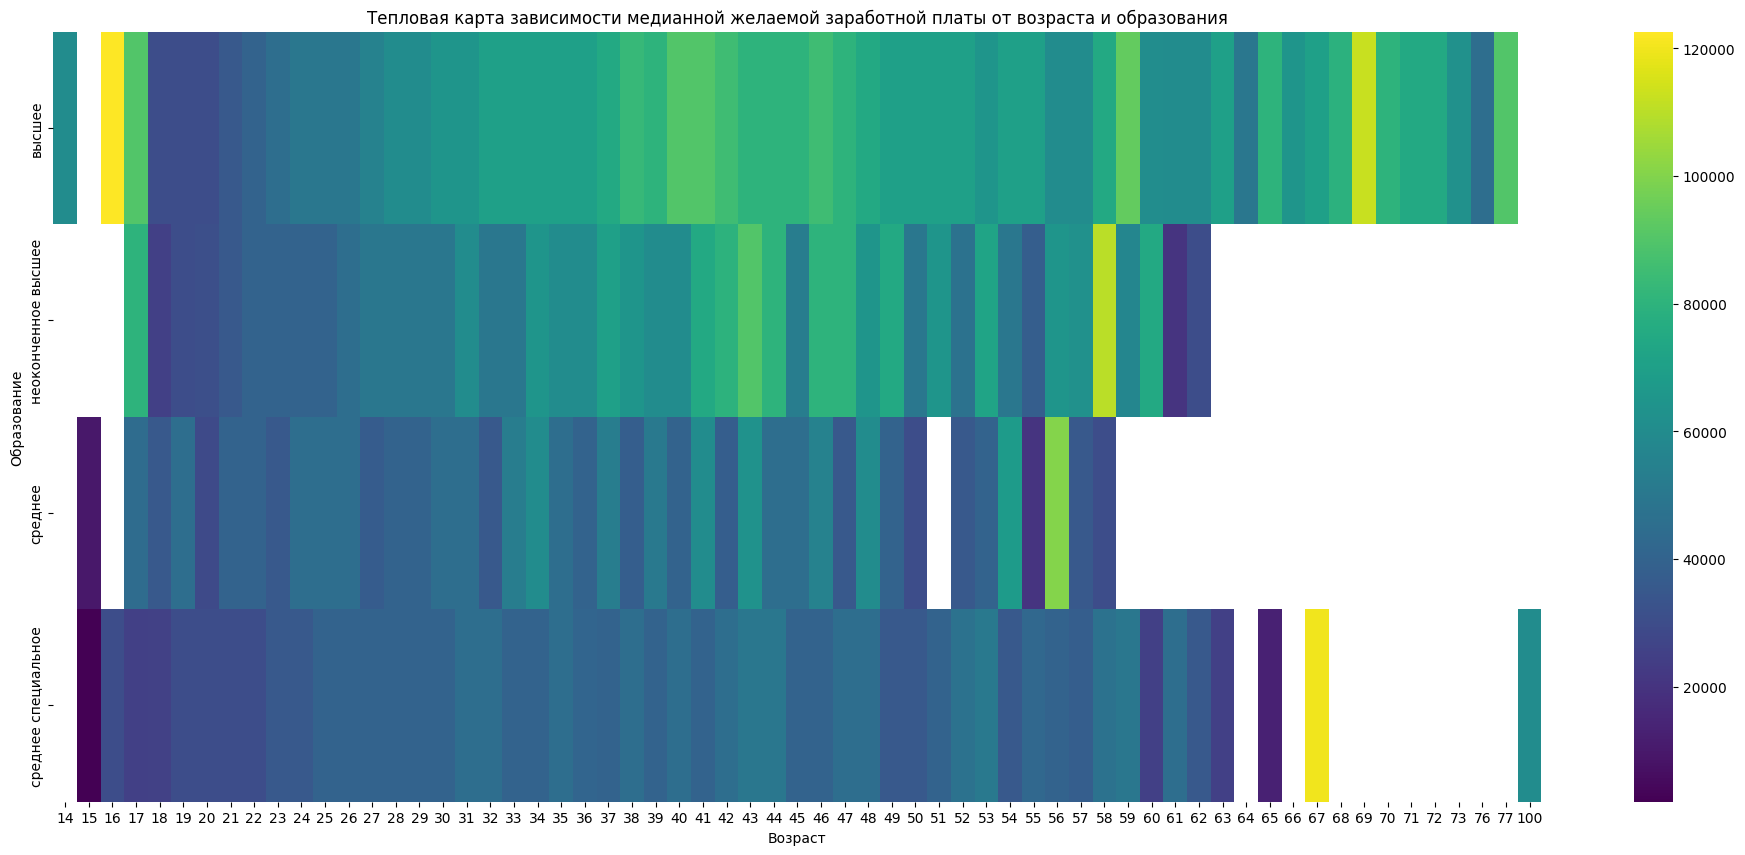

In [32]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы

df_salary_without_anomalies = df[df['ЗП (руб)'] < 1000000]

# Создаем сводную таблицу 

df_median_salary_pivot = pd.pivot_table(
    df_salary_without_anomalies,
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median'
)

# Строим визуализацию

plt.figure(figsize=(24, 10))
sns.heatmap(df_median_salary_pivot, fmt=".0f", cmap='viridis')

# Оформляем визуализацию

plt.title('Тепловая карта зависимости медианной желаемой заработной платы от возраста и образования')
plt.xlabel('Возраст')
plt.ylabel('Образование')

plt.show()


- Подавляющее большинство категорий образования показывает тенденцию к росту медианной заработной платы с возрастом, что свидетельствует о большей компетентной оснащенности и опыте у взрослых людей с высшим и неоконченным высшим образованием.
- В категории высшего образования медианная зарплата начинает стремительно расти с более младшего возраста. Тогда как для среднего образования медианное значение растет с более старшего возраста. Данный факт может объясняться тем, что люди с высшим образованием независимо от возраста, имеют больше компетенций в сфере, на должность в которой претендуют.

---

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [33]:
# Строим копию исходного датасета с опытом работы в годах

df_exp_years = df.copy()
df_exp_years['Опыт работы (лет)'] = df_exp_years['Опыт работы (месяц)'] / 12

# Строим диаграмму рассеяния для признаков возраст и опыт работы (лет)

fig = px.scatter(df_exp_years, x='Возраст', y='Опыт работы (лет)')
fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], name='Граница для аномалий'))

# Оформляем визуализацию

fig.update_layout(title='Зависимость опыта работы (лет) от возраста соискателя')
fig.update_xaxes(title='Возраст', col=1)
fig.update_yaxes(title='Опыт работы (лет)', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Диаграмма рассеяния опыта работы и возраста.html')

Для большинства соискателей точки расположены ниже аномальной линии, что говорит о том, что их опыт работы меньше числа лет. Данный факт является вполне ожидаемым, чего нельзя сказать о семи особых точках выше линии аномалий. Таким образом, в данных присутствует 7 выбросов, для которых опыт работы в годах выше, чем возраст.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [34]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы, находим медианную заработную плату в группировке по образованию и полной занятости

df_median_salary = df[df['ЗП (руб)'] < 1000000].groupby(['полная занятость', 'Образование'])['ЗП (руб)'].median().reset_index()

# Строим визуализацию 

fig = px.bar(df_median_salary, x='Образование', y='ЗП (руб)', color='полная занятость')

# Оформляем визуализацию

fig.update_layout(title='Зависимость медианной заработной платы от уровня образования и полной занятости')
fig.update_xaxes(title='Уровень образования', col=1)
fig.update_yaxes(title='Медианная заработная плата', col=1)

fig.show()

# Экспорт в HTML
fig.write_html('graphics_html/Доп. график 1.html')

Таким образом, при прогнозировании заработной платы важно будет учитывать совокупность признаков образования и полной занятости, поскольку медианный уровень желаемой заработной платы значительно растет, если соискатели готовы работать полный день. Причем данный рост происходит для каждой категории образования в разных пропорциях.

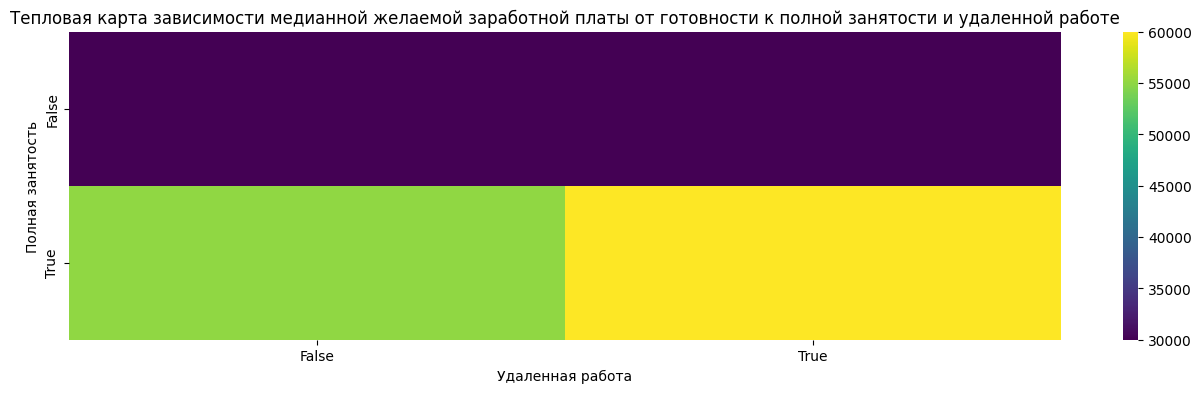

In [35]:
# Рассматриваем датасет, в котором исключены аномальные строки с большим числом желаемой заработной платы

df_salary_without_anomalies = df[df['ЗП (руб)'] < 1000000]

# Создаем сводную таблицу 

df_median_salary_pivot = pd.pivot_table(
    df_salary_without_anomalies,
    index='полная занятость',
    columns='удаленная работа',
    values='ЗП (руб)',
    aggfunc='median'
)

# Строим визуализацию

plt.figure(figsize=(16, 4))
sns.heatmap(df_median_salary_pivot, fmt=".0f", cmap='viridis')

# Оформляем визуализацию

plt.title('Тепловая карта зависимости медианной желаемой заработной платы от готовности к полной занятости и удаленной работе')
plt.xlabel('Удаленная работа')
plt.ylabel('Полная занятость')

plt.show()

Соискатели, претендующие на удаленную работу и готовые работать полный рабочий день, зачастую требуют большей заработной платы. Тогда как соискатели, готовые работать полный день, имеют меньшие ожидания по заработной плате вне зависимости от возможности удаленной работы. Таким образом, при прогнозировании заработной платы также стоит уделить внимание сочетанию признаков полной занятости и удаленной работы.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [36]:
# Удаляем дубликаты

df_clear = df.drop_duplicates()

print('Число полных копий:', df.shape[0] - df_clear.shape[0])

Число полных копий: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [37]:
# Считаем количество пропущенных значений по столбцам

df_clear.isnull().sum().sort_values(ascending=False)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
Ищет работу на должность:            0
проектная работа                     0
удаленная работа                     0
вахтовый метод                       0
сменный график                       0
полный день                          0
гибкий график                        0
волонтерство                         0
стажировка                           0
полная занятость                     0
Готовность к командировкам           0
частичная занятость                  0
Готовность к переезду                0
Город                                0
Возраст                              0
Пол                                  0
Образование                          0
Авто                                 0
Обновление резюме                    0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [38]:
# Удаляем строки, где в столбцах 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы' пропущены значения

df_clear = df_clear.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])

median_exp = df_clear['Опыт работы (месяц)'].median()
df_clear['Опыт работы (месяц)'].fillna(median_exp, inplace=True)

df_clear.isnull().sum().sort_values(ascending=False)

Ищет работу на должность:          0
частичная занятость                0
удаленная работа                   0
вахтовый метод                     0
сменный график                     0
полный день                        0
гибкий график                      0
волонтерство                       0
стажировка                         0
полная занятость                   0
проектная работа                   0
Готовность к командировкам         0
Последнее/нынешнее место работы    0
Готовность к переезду              0
Город                              0
Опыт работы (месяц)                0
Возраст                            0
Пол                                0
Образование                        0
Авто                               0
Обновление резюме                  0
Последняя/нынешняя должность       0
ЗП (руб)                           0
dtype: int64

In [39]:
# Ответ на задание с платформы

mean_exp = round(df_clear['Опыт работы (месяц)'].mean())
print('Среднее значение в столбце "Опыт работы (месяц)":', mean_exp)

Среднее значение в столбце "Опыт работы (месяц)": 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [40]:
mask_1 = df_clear['ЗП (руб)'] >= 1000
mask_2 = df_clear['ЗП (руб)'] <= 1000000

df_clear_salary = df_clear[mask_1 & mask_2]

print('Число выбросов:', df_clear.shape[0] - df_clear_salary.shape[0])

Число выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [41]:
mask = (df_clear_salary['Опыт работы (месяц)'] / 12) <= df_clear_salary['Возраст']

df_clear_exp = df_clear_salary[mask]

print('Число выбросов:', df_clear_salary.shape[0] - df_clear_exp.shape[0])

Число выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

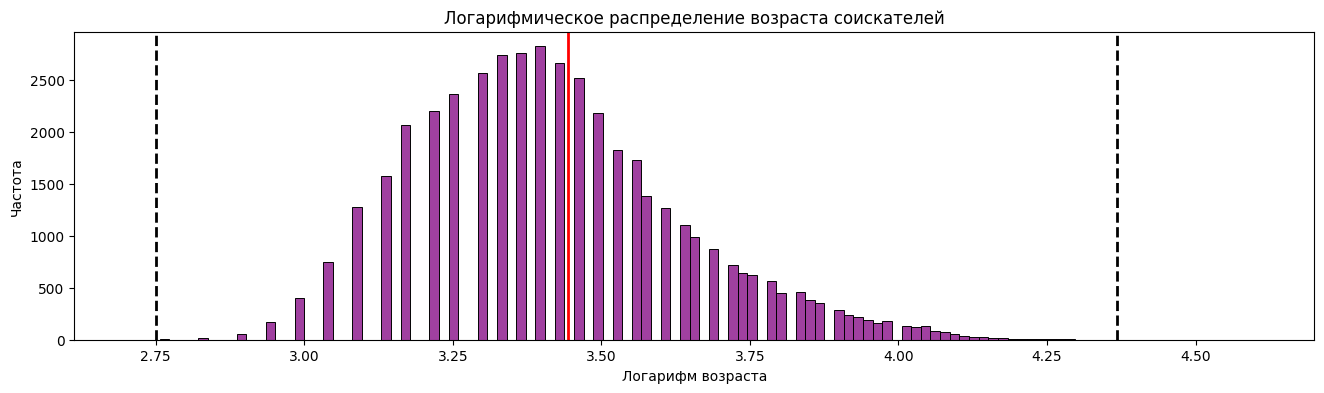

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
log_age = np.log(df_clear_exp['Возраст']) # Логарифмируем возраст 

histplot = sns.histplot(log_age, color= 'purple', ax=ax)

histplot.axvline(log_age.mean(), color='red', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)

plt.ylabel('Частота')
plt.xlabel('Логарифм возраста')
histplot.set_title('Логарифмическое распределение возраста соискателей')
plt.show()

Логарифмическое распределение, согласно построенному графику, ассиметрично вправо.

In [43]:
# Найдем с помощью z-статистики нужные выбросы

from scipy.stats import zscore

# Находим значение z-статистики и строки, которые считаются выбросами
z_stat = zscore(log_age)
df_clear_age = df_clear_exp[(z_stat < -3) | (z_stat > 4)]

# Формируем финальный датасет без данных строк

df_final = df_clear_exp[(z_stat >= -3) & (z_stat <= 4)]

print('Возраст, который считается выбросом методом z-отклонения:', list(df_clear_age['Возраст'].unique()))
print(f'Итого, в финальном датасете {df_final.shape[0]} строк и {df_final.shape[1]} столбца.')

Возраст, который считается выбросом методом z-отклонения: [15, 100]
Итого, в финальном датасете 44482 строк и 23 столбца.
